# Movie Recomendation

## Project Overview
---
Film menjadi salah satu media hiburan bagi manusia untuk mendapatkan kesenangan, edukasi dan lain sebagainya. Tahun ke tahun perkembangan film semakin pesat yang juga dipengaruhi perkembangan teknologi informasi yang semakin maju. Teknologi informasi yang berkembang menjadikan perluang bagi produser film untuk membuat karya yang beraneka ragam, lebih kreatif dan unik. Perkembangan tersebut akhirnya melahirkan berbagai macam film dengan genre yang berbeda beda.

Tiap orang memiliki selera atau minat yang berbeda tiap tiap genre, sebagai contoh mereka yang menyukai film teka teki seperti sherlock holmes mungkin saja juga menyukai film detektif conan. Bahkan ada yang menyukai film tertentu atas rekomendasi rekan atau orang lain yang mempengaruhi selera film mereka. Hal ini menjadi sebuah peluang dan masalah bagi provider atau penyedia film untuk merekomendasikan film mana yang cocok bagi penonton mereka.

Rekomendasi film yang sesuai akan meningkatkan retensi penonton untuk selalu menonton film dari provider tersebut, sebaliknya bila rekomendasi tidak sesuai ada kemungkinan penonton akan merasa bosan karena tidak menemukan film yang sesuai dengan selera mereka. Oleh karena itu perusahaan provider film membutuhkan suatu metode untuk memberikan rekomendasi film yang sesuai dengan minat dan selera mereka agar penonton terus menggunakan platform perusahaan provider film tersebut terus menerus yang berdampak pada keuntungan perusahaan.
  

## Business Understanding
---
### Problem Statement
Berdasarkan urain latar belakang diatas, permasalahan yang dapat diselesaikan pada proyek ini ialah :

* Berdasarkan data pengguna, bagaimana membuat sistem rekomendasi yang terpersonalisasi dengan teknik collaborative filtering ?

### Goals
* Menghasilkan sejumlah rekomendasi movie yang sesuai dengan preferensi penonton dengan teknik collaboratif filtering.

### Solutions Statement
* Menganalisis Data dengan melakukan univariate analysis
* Mempersiapkan Data untuk digunakan dalam model
* Mengembangkan Model dengan pendekatan collaborative filtering yang bekerja berdasarkan rating penonton.


## Data Understanding

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path

In [ ]:
movies = pd.read_csv('/content/drive/MyDrive/Dicoding/Machine Learning Path /Machine Learning Terapan/Proyek Kedua (Akhir) : Recomendation System/Dataset/Netflix_Dataset_Movie.csv')
ratings = pd.read_csv('/content/drive/MyDrive/Dicoding/Machine Learning Path /Machine Learning Terapan/Proyek Kedua (Akhir) : Recomendation System/Dataset/Netflix_Dataset_Rating.csv').sample(100000, random_state=25)

In [ ]:
print(f"Jumlah Movie : {len(movies.Movie_ID.unique())} Buku")
print(f"Jumlah Perating :{len(ratings.User_ID.unique())} Pengguna")
print(f"Jumlah Penilain Movie :{len(ratings)} Rating")

Jumlah Movie : 17770 Buku
Jumlah Perating :66327 Pengguna
Jumlah Penilain Movie :100000 Rating


### Exploratory Data Analysis

Variabel-variabel pada Movie Dataset adalah sebagai berikut :
1. Movies
  * `Movie_ID` = Identifier Movie
  * `Year` = Tahun Penayangan
  * `Name` = Nama Movie

2. Ratings
  * `User_ID` : ID pengguna
  * `Rating` : rating yang diberikan oleh penonton (1-5)
  * `Movie_ID` : Identifier Movie

#### Univariate Analysis

##### Movies

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17770 entries, 0 to 17769
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Movie_ID  17770 non-null  int64 
 1   Year      17770 non-null  int64 
 2   Name      17770 non-null  object
dtypes: int64(2), object(1)
memory usage: 416.6+ KB


In [ ]:
movies.describe()

,Movie_ID,Year
count,17770.000000,17770.000000
mean,8885.500000,1990.235566
std,5129.901477,16.564501
min,1.000000,1915.000000
25%,4443.250000,1985.000000
50%,8885.500000,1997.000000
75%,13327.750000,2002.000000
max,17770.000000,2005.000000


In [ ]:
movies.head()

,Movie_ID,Year,Name
0,1,2003,Dinosaur Planet
1,2,2004,Isle of Man TT 2004 Review
2,3,1997,Character
3,4,1994,Paula Abdul's Get Up & Dance
4,5,2004,The Rise and Fall of ECW


In [ ]:
movies.isnull().sum()

Movie_ID    0
Year        0
Name        0
dtype: int64

array([[<Axes: title={'center': 'Year'}>]], dtype=object)

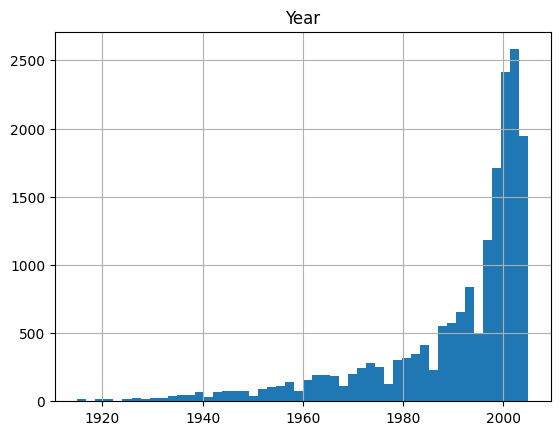

In [ ]:
movies.hist(bins=50, column='Year')

In [ ]:
print(f"Jumlah Movie berdasarkan Movie ID {len(movies.Movie_ID.unique())}")
print(f"Jumlah Tahun Rilis berdasarkan Movie ID {len(movies.Year.unique())}")

Jumlah Movie berdasarkan Movie ID 17770
Jumlah Tahun Rilis berdasarkan Movie ID 91


##### Rating

In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 12166179 to 2067128
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   User_ID   100000 non-null  int64
 1   Rating    100000 non-null  int64
 2   Movie_ID  100000 non-null  int64
dtypes: int64(3)
memory usage: 3.1 MB


In [ ]:
ratings.describe().applymap(lambda x: f"{x:0.2f}")

,User_ID,Rating,Movie_ID
count,100000.00,100000.00,100000.00
mean,1320551.54,3.59,2303.55
std,764802.55,1.07,1304.48
min,6.00,1.00,3.00
25%,661203.25,3.00,1175.00
50%,1316604.00,4.00,2342.00
75%,1983701.00,4.00,3433.00
max,2649335.00,5.00,4496.00


In [ ]:
ratings.head()

,User_ID,Rating,Movie_ID
12166179,1459896,4,3267
10018769,338682,5,2660
16764653,2147929,4,4356
10012422,935412,5,2660
11643960,2568140,4,3138


In [ ]:
ratings.isnull().sum()

User_ID     0
Rating      0
Movie_ID    0
dtype: int64

array([[<Axes: title={'center': 'Rating'}>]], dtype=object)

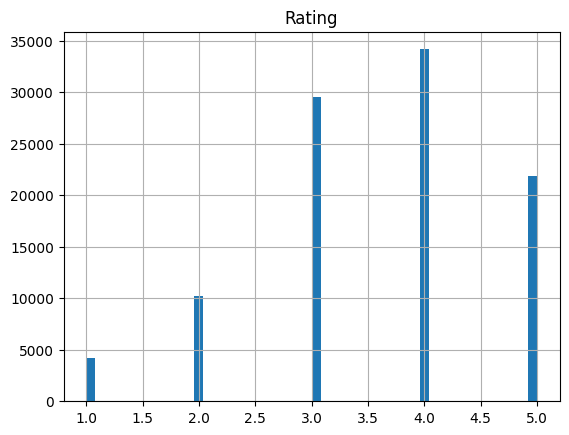

In [ ]:
ratings.hist(bins=50, column = 'Rating')

## Data Preparation

In [ ]:
data = ratings
data

,User_ID,Rating,Movie_ID
12166179,1459896,4,3267
10018769,338682,5,2660
16764653,2147929,4,4356
10012422,935412,5,2660
11643960,2568140,4,3138
...,...,...,...
8897705,2136217,3,2376
16113565,290385,3,4237
14452830,1497845,2,3824
4574981,1631009,4,1220


In [ ]:
# Mengubah User_ID menjadi list tanpa nilai yang sama
user_ids = data['User_ID'].unique().tolist()
print('list User_ID: ', user_ids)

# Melakukan encoding User_ID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded User_ID : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke User_ID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke User_ID: ', user_encoded_to_user)

list User_ID:  [1459896, 338682, 2147929, 935412, 2568140, 1407566, 1826554, 654304, 1143068, 2479322, 2354601, 613510, 2242160, 1433093, 398371, 456230, 1149181, 2083636, 1322031, 123910, 1697933, 537523, 2003876, 2462672, 1661344, 1685089, 2281592, 2230641, 883375, 200734, 1101768, 1071141, 2312452, 16558, 1569627, 83278, 669086, 491293, 1063883, 2215009, 2549990, 1548657, 1867761, 222341, 2633860, 1674620, 2006945, 1854606, 1581481, 923325, 1168486, 2089157, 2353323, 2113010, 33430, 1396516, 532272, 368124, 286567, 2179550, 1998070, 514447, 313540, 2551486, 1837594, 1339806, 2248543, 1388677, 1309691, 1767551, 1007172, 2498718, 717024, 1813924, 2193903, 83756, 149028, 519462, 978062, 1099459, 479282, 2277253, 2371105, 2131774, 2234801, 1272134, 1729889, 507436, 1473192, 1674600, 1216014, 1338823, 1891779, 1539901, 2613745, 2252978, 2370740, 814775, 1977640, 575288, 1293051, 608987, 1325816, 2277058, 1256534, 1424768, 2066387, 1212509, 2303843, 1963939, 48285, 2183370, 2614903, 13305

In [ ]:
# Mengubah Movie_ID menjadi list tanpa nilai yang sama
movie_ids = data['Movie_ID'].unique().tolist()
print('list Movie_ID: ', movie_ids)

# Melakukan proses encoding Movie_ID
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}
print('encoded Movie_ID : ', movie_to_movie_encoded)

# Melakukan proses encoding angka ke Movie_ID
movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}
print('encoded angka ke Movie_ID: ', movie_encoded_to_movie)

list Movie_ID:  [3267, 2660, 4356, 3138, 2953, 3605, 2780, 262, 2200, 1291, 2499, 551, 3638, 621, 708, 2408, 1324, 3085, 3290, 3309, 2938, 2675, 3610, 273, 445, 3047, 971, 3371, 3650, 2342, 78, 1719, 1476, 3197, 1595, 3928, 2803, 1974, 954, 3161, 3938, 483, 1542, 4123, 1902, 2177, 2192, 3165, 3611, 4472, 1905, 3860, 3368, 30, 4056, 167, 4353, 548, 2122, 1585, 2900, 311, 58, 2913, 3962, 4136, 1754, 3355, 2009, 3333, 681, 2955, 1068, 3954, 2391, 269, 252, 1202, 3153, 1518, 312, 4306, 3466, 2800, 143, 2865, 607, 1659, 4043, 111, 3864, 4256, 1561, 1865, 3736, 2874, 2743, 4369, 1877, 4145, 3347, 1435, 2862, 705, 886, 2992, 571, 2612, 3893, 313, 3935, 191, 1470, 1843, 2580, 1743, 4227, 3825, 175, 831, 443, 1571, 2890, 4260, 2135, 3624, 2186, 283, 2043, 2195, 2128, 1180, 3182, 118, 2922, 2782, 3510, 1615, 4141, 4432, 636, 2372, 1425, 4485, 3583, 1664, 3890, 3098, 3379, 3684, 2352, 1700, 4496, 918, 985, 4345, 2290, 2095, 1709, 3265, 846, 4216, 3612, 516, 1642, 348, 4402, 1983, 299, 1401, 1744,

In [ ]:
# Mapping User_ID ke dataframe user
data['user'] = data['User_ID'].map(user_to_user_encoded)

# Mapping Movie_ID ke dataframe movie
data['movie'] = data['Movie_ID'].map(movie_to_movie_encoded)

In [ ]:
data.isnull().sum()

User_ID     0
Rating      0
Movie_ID    0
user        0
movie       0
dtype: int64

In [ ]:
data

,User_ID,Rating,Movie_ID,user,movie
12166179,1459896,4,3267,0,0
10018769,338682,5,2660,1,1
16764653,2147929,4,4356,2,2
10012422,935412,5,2660,3,1
11643960,2568140,4,3138,4,3
...,...,...,...,...,...
8897705,2136217,3,2376,66324,555
16113565,290385,3,4237,14014,1177
14452830,1497845,2,3824,45774,303
4574981,1631009,4,1220,66325,280


In [ ]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah movie
num_movie = len(movie_encoded_to_movie)
print(num_movie)

# Mengubah rating menjadi nilai float
data['Rating'] = data['Rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(data['Rating'])

# Nilai maksimal rating
max_rating = max(data['Rating'])

print('Number of User: {}, Number of Movie: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_movie, min_rating, max_rating
))

66327
1350
Number of User: 66327, Number of Movie: 1350, Min Rating: 1.0, Max Rating: 5.0


### Spliting Data

In [ ]:
# Mengacak dataset
data = data.sample(frac=1, random_state=25)
data

,User_ID,Rating,Movie_ID,user,movie
15702752,1498217,4.0,4109,35745,417
6903407,429737,5.0,1865,18981,93
7828760,1054172,3.0,2122,35335,58
1505859,1971788,2.0,378,1553,631
13155736,1213383,3.0,3466,58840,82
...,...,...,...,...,...
8836941,534193,5.0,2372,30348,141
1240133,1969420,4.0,329,6032,542
13636656,1215050,3.0,3610,6404,22
9917874,2100280,3.0,2617,61947,219


In [ ]:
# Membuat variabel x untuk mencocokkan data user dan resto menjadi satu value
x = data[['user', 'movie']].values

# Membuat variabel y untuk membuat rating dari hasil
y = data['Rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * data.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[35745   417]
 [18981    93]
 [35335    58]
 ...
 [ 6404    22]
 [61947   219]
 [25987    63]] [0.75 1.   0.5  ... 0.5  0.5  0.75]


## Model Development

### Collaborative Filtering

#### Training Process

In [ ]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_movie, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_movie = num_movie
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.movie_embedding = layers.Embedding( # layer embeddings movie
        num_movie,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.movie_bias = layers.Embedding(num_movie, 1) # layer embedding movie bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    movie_vector = self.movie_embedding(inputs[:, 1]) # memanggil layer embedding 3
    movie_bias = self.movie_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)

    x = dot_user_movie + user_bias + movie_bias

    return tf.nn.sigmoid(x) # activation sigmoid

In [ ]:
model = RecommenderNet(num_users, num_movie, 25) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [ ]:
model.summary()

Model: "recommender_net_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_20 (Embedding)    multiple                  1658175   
                                                                 
 embedding_21 (Embedding)    multiple                  66327     
                                                                 
 embedding_22 (Embedding)    multiple                  33750     
                                                                 
 embedding_23 (Embedding)    multiple                  1350      
                                                                 
Total params: 1759602 (6.71 MB)
Trainable params: 1759602 (6.71 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Memulai training

history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 16,
    epochs = 20,
    validation_data = (x_val, y_val)
)

Epoch 1/20
5000/5000 [==============================] - 117s 23ms/step - loss: 0.6655 - root_mean_squared_error: 0.2814 - val_loss: 0.6473 - val_root_mean_squared_error: 0.2633
Epoch 2/20
5000/5000 [==============================] - 115s 23ms/step - loss: 0.6291 - root_mean_squared_error: 0.2484 - val_loss: 0.6440 - val_root_mean_squared_error: 0.2600
Epoch 3/20
5000/5000 [==============================] - 114s 23ms/step - loss: 0.6209 - root_mean_squared_error: 0.2405 - val_loss: 0.6408 - val_root_mean_squared_error: 0.2570
Epoch 4/20
5000/5000 [==============================] - 117s 23ms/step - loss: 0.6143 - root_mean_squared_error: 0.2343 - val_loss: 0.6394 - val_root_mean_squared_error: 0.2557
Epoch 5/20
5000/5000 [==============================] - 124s 25ms/step - loss: 0.6085 - root_mean_squared_error: 0.2287 - val_loss: 0.6376 - val_root_mean_squared_error: 0.2541
Epoch 6/20
5000/5000 [==============================] - 120s 24ms/step - loss: 0.6026 - root_mean_squared_error: 0.

## Evaluation

In [ ]:
model.evaluate(x_val,y_val)

625/625 [==============================] - 3s 4ms/step - loss: 0.6374 - root_mean_squared_error: 0.2540


[0.637365996837616, 0.25402650237083435]

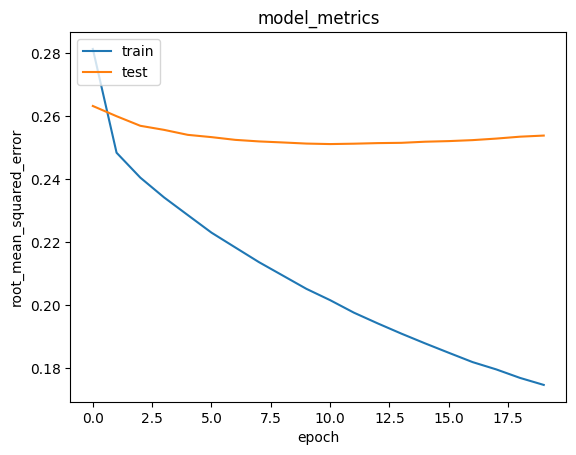

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Mendapatkan rekomendasi Movie

In [ ]:
movie_df = movies
df = pd.read_csv('/content/drive/MyDrive/Dicoding/Machine Learning Path /Machine Learning Terapan/Proyek Kedua (Akhir) : Recomendation System/Dataset/Netflix_Dataset_Rating.csv')

# Mengambil sample user
user_id = df.User_ID.sample(1).iloc[0]
movie_watched_by_user = df[df.User_ID == user_id]

# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html
movie_not_watched = movie_df[~movie_df['Movie_ID'].isin(movie_watched_by_user.Movie_ID.values)]['Movie_ID']
movie_not_watched = list(
    set(movie_not_watched)
    .intersection(set(movie_to_movie_encoded.keys()))
)

movie_not_watched = [[movie_to_movie_encoded.get(x)] for x in movie_not_watched]
user_encoder = user_to_user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movie_not_watched), movie_not_watched)
)

In [ ]:
user_movie_array

array([[14247,  1045],
       [14247,  1117],
       [14247,   745],
       ...,
       [14247,  1144],
       [14247,   740],
       [14247,  1161]])

In [ ]:
ratings = model.predict(user_movie_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movie_encoded_to_movie.get(movie_not_watched[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Movie with high ratings from user')
print('----' * 8)

top_movie_user = (
    movie_watched_by_user.sort_values(
        by = 'Rating',
        ascending=False
    )
    .head(5)
    .Movie_ID.values
)

movie_df_rows =movie_df[movie_df['Movie_ID'].isin(top_movie_user)]
movie_df_rows
for row in movie_df_rows.itertuples():
    print(row.Name)

print('----' * 8)
print('Top 10 Movie recommendation')
print('----' * 8)

recommended_movie = movie_df[movie_df['Movie_ID'].isin(recommended_movie_ids)]
for row in recommended_movie.itertuples():
    print(row.Name)

37/37 [==============================] - 0s 4ms/step
Showing recommendations for users: 709532
Movie with high ratings from user
--------------------------------
Lilo and Stitch
Ray
The Mummy
Beverly Hills Cop
Elizabeth
--------------------------------
Top 10 Movie recommendation
--------------------------------
The Autobiography of Miss Jane Pittman
Stargate SG-1: Season 7
Pee-Wee's Playhouse: Vol. 1
The Simpsons: Season 6
The Twilight Zone: Vol. 33
The Twilight Zone: Vol. 41
Hellfighters
Farscape: Season 2
Monk: Season 2
The Blues Brothers: Extended Cut
